In [1]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import datetime
import plotly.graph_objects as go
import numpy as np


In [9]:
source_df = pd.read_csv("ap.csv")
main_df = source_df.iloc[:50000].copy()
main_df.assign(day=1)[['year','period','day']]
main_df['date'] = pd.to_datetime(main_df.assign(day=1).rename(columns={'period':'month'})[['year','month','day']])


In [11]:
DEFAULT_METRIC_1 = 'Electricity per KWH'

In [13]:
test_df = main_df[(main_df['name'] == DEFAULT_METRIC_1) & (main_df['location type'] == 'National')]
coefficients = np.polyfit(main_df['date'].astype('int64'), main_df['value'], 1)
poly1 = np.poly1d(coefficients)
y1_fit = poly1(main_df['date'].astype('int64'))


In [15]:
def get_visibilities(index,traces_per_set,num_of_sets):
    visibility_list = [[True if y == index else False for x in range(0,traces_per_set)] for y in range(0,num_of_sets)]
    return [item for sublist in visibility_list for item in sublist]

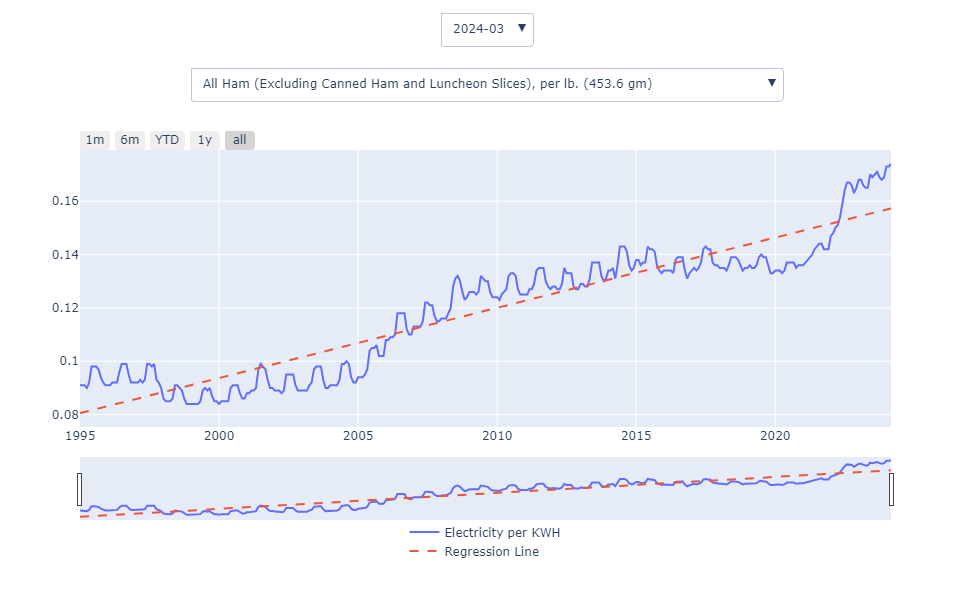

In [39]:
# Create initial figure
fig = go.Figure()

# Get unique categories from the DataFrame
metrics = main_df['name'].sort_values().unique()
metrics_size = len(metrics)
default_metric_index = int(np.where(metrics ==DEFAULT_METRIC_1)[0][0])

# Add a trace for each category
for metric in metrics:
    # Filter data for the current category
    filtered_df = main_df[(main_df['name'] == metric) & (main_df['location type'] == 'National')]
    
    # Add a trace for the current category
    default_visible = True if metric == DEFAULT_METRIC_1 else False
    fig.add_trace(go.Scatter(x=filtered_df['date'], 
                             y=filtered_df['value'], 
                             mode='lines', 
                             name=metric,
                             visible=default_visible,
                             hovertemplate='%{y:$,.3f}'))
    if (len(filtered_df) > 0):
        coefficients = np.polyfit(filtered_df['date'].astype('int64'), filtered_df['value'], 1)
        poly1 = np.poly1d(coefficients)
        y_fit = poly1(filtered_df['date'].astype('int64'))
        fig.add_trace(go.Scatter(x=filtered_df['date'], 
                             y=y_fit, mode='lines', 
                             line=dict(dash='dash'),
                             visible=default_visible,
                             name='Regression Line'))
    else:
        fig.add_trace(go.Scatter(x=filtered_df['date'], 
                             y=[0] * len(filtered_df), mode='lines', 
                             line=dict(dash='dash'),
                             visible=default_visible,
                             name='Regression Line'))
    

# Create dropdown buttons
metric_dropdown = []

for index, metric in enumerate(metrics):
    metric_dropdown.append(
        {'label': metric, 'method': 'update', 'args': [{'visible': get_visibilities(index,2,metrics_size)}]}
    )
metric_menu = {
        'buttons': metric_dropdown,
        'direction': 'down',
        'showactive': True,
        'active': 0,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.3,
        'yanchor': 'top'
        
    }

date_dropdown = []
dates = main_df['date'].sort_values(ascending=False).unique()

for d, d_s in zip(dates, np.datetime_as_string(dates,unit='M')): 
    date_dropdown.append(
        {
                'label': d_s,
                'method': 'relayout',
                'args': [{'xaxis.range': [d - np.timedelta64(3*365,'D'), d]}]
            }
    )    
date_menu = {
        'buttons': date_dropdown,
        'direction': 'down',
        'showactive': True,
        'yanchor': 'top',
        'y': 1.5,
        'xanchor': 'center',
            'x': 0.5,
}
    
    
# Update layout to include the dropdown menu
fig.update_layout(
     height=600,
    updatemenus=[metric_menu, date_menu],
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    legend=dict(
        yanchor="bottom",  # Anchor to the bottom
        y=-0.5,  # Position below the plot
        xanchor="center",  # Center horizontally
        x=0.5  # Position at the center
    ),

)

# Show the figure
fig.show()

In [23]:
type(dates[0])

numpy.datetime64

In [41]:
main_df

row_id          series_id  year  period  value  footnote_codes  \
0           0  APU0000701111      1995       1  0.238             NaN   
1           1  APU0000701111      1995       2  0.242             NaN   
2           2  APU0000701111      1995       3  0.242             NaN   
3           3  APU0000701111      1995       4  0.236             NaN   
4           4  APU0000701111      1995       5  0.244             NaN   
...       ...                ...   ...     ...    ...             ...   
49995   49995  APU0200706311      1997       3  1.046             NaN   
49996   49996  APU0200706311      1997       4  1.035             NaN   
49997   49997  APU0200706311      1997       5  1.058             NaN   
49998   49998  APU0200706311      1997       6  1.101             NaN   
49999   49999  APU0200706311      1997       7  1.094             NaN   

                                                name           location  \
0      Flour, white, all purpose, per lb. (453.6 gm)  U.S. city average   
1      Flour, white, all purpose, per lb. (453.6 gm)  U.S. city average   
2      Flour, white, all purpose, per lb. (453.6 gm)  U.S. city average   
3      Flour, white, all purpose, per lb. (453.6 gm)  U.S. city average   
4      Flour, white, all purpose, per lb. (453.6 gm)  U.S. city average   
...                                              ...                ...   
49995      Turkey, frozen, whole, per lb. (453.6 gm)      Midwest urban   
49996      Turkey, frozen, whole, per lb. (453.6 gm)      Midwest urban   
49997      Turkey, frozen, whole, per lb. (453.6 gm)      Midwest urban   
49998      Turkey, frozen, whole, per lb. (453.6 gm)      Midwest urban   
49999      Turkey, frozen, whole, per lb. (453.6 gm)      Midwest urban   

      location type       date  
0          National 1995-01-01  
1          National 1995-02-01  
2          National 1995-03-01  
3          National 1995-04-01  
4          National 1995-05-01  
...             ...        ...  
49995      Regional 1997-03-01  
49996      Regional 1997-04-01  
49997      Regional 1997-05-01  
49998      Regional 1997-06-01  
49999      Regional 1997-07-01  

[50000 rows x 10 columns]

In [47]:
source_df = pd.read_csv("ap.csv")
#main_df = source_df.iloc[:50000].copy()
main_df = source_df.copy()

main_df.assign(day=1)[['year','period','day']]
main_df['date'] = pd.to_datetime(main_df.assign(day=1).rename(columns={'period':'month'})[['year','month','day']])


DEFAULT_METRIC_1 = 'Electricity per KWH'
DEFAULT_METRIC_2 = 'Gasoline, unleaded regular, per gallon/3.785 liters'


# Get unique categories from the DataFrame
metrics = main_df['name'].sort_values().unique()

list(metrics)

['All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)',
 'All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)',
 'All Pork Chops, per lb. (453.6 gm)',
 'All Uncooked Beef Roasts, per lb. (453.6 gm)',
 'All Uncooked Beef Steaks, per lb. (453.6 gm)',
 'All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)',
 'All soft drinks, 12 pk, 12 oz., cans, per 12 oz. (354.9 ml)',
 'All soft drinks, per 2 liters (67.6 oz)',
 'All uncooked ground beef, per lb. (453.6 gm)',
 'American processed cheese, per lb. (453.6 gm)',
 'Apple Sauce, any variety, all sizes, per lb. (453.6 gm)',
 'Apples, Red Delicious, per lb. (453.6 gm)',
 'Automotive diesel fuel, per gallon/3.785 liters',
 'Bacon, sliced, per lb. (453.6 gm)',
 'Bananas, per lb. (453.6 gm)',
 'Beans, dried, any type, all sizes, per lb. (453.6 gm)',
 'Beef for stew, boneless, per lb. (453.6 gm)',
 'Bologna, all beef or mixed, per lb. (453.6 gm)',
 'Bread, French, per lb. (453.6 gm)',
 'Bread, wh

In [55]:
filtered_df['value'].values[0]

1.057